In [1]:
import numpy as np
import matplotlib as plt


def random_points(num_points, num_dimensions):

    return np.random.randn(num_points, num_dimensions)

In [2]:
def average_distance_sp(points, selected_point):
    points_without_selected = points[np.any(points != selected_point, axis=1)]

    # Calculate Euclidean distances between the selected point and all other points
    distances = np.linalg.norm(points_without_selected  - selected_point, axis=1)

    # Calculate the average distance
    avg_distance = np.mean(distances)

    return avg_distance

In [3]:
def minimum_distance_sp(points, selected_point):
    # Remove the selected point from points array
    points_without_selected = points[np.any(points != selected_point, axis=1)]

    # Calculate distances to all other points
    distances = np.linalg.norm(points_without_selected - selected_point, axis=1)
    # Calculate the minimum distance
    min_distance= np.min(distances)
    return min_distance


In [4]:
def closest_to_average_ratio(min_distance, avg_distance):

    # Calculate the ratio
    ratio = min_distance / avg_distance

    return ratio

In [5]:
mean_avg_distances = []
std_avg_distances = []
mean_min_distances = []
std_min_distances = []
mean_closest_to_avg_ratios = []
std_closest_to_avg_ratios = []

for dim in range(1, 101):
    avg_distances = []
    min_distances = []
    ratios = []
    num_points = 1000
    Sd = random_points(num_points, dim)
    num_selected_points = 100

    for _ in range(num_selected_points):
        selected_point_index = np.random.randint(0, num_points)  # Select a random point index
        selected_point = Sd[selected_point_index]  # Get the selected point

        # Calculate average distance, minimum distance, and closest-to-average ratio
        avg_dist = average_distance_sp(Sd, selected_point)
        min_dist = minimum_distance_sp(Sd, selected_point)
        ratio = closest_to_average_ratio(min_dist, avg_dist)

        avg_distances.append(avg_dist)
        min_distances.append(min_dist)
        ratios.append(ratio)

    # Calculate mean and standard deviation for all 100 selected points
    mean_avg_dist = np.mean(avg_distances)
    std_avg_dist = np.std(avg_distances)

    mean_min_dist = np.mean(min_distances)
    std_min_dist = np.std(min_distances)

    mean_ratio = np.mean(ratios)
    std_ratio = np.std(ratios)

    # Append the calculated values to the list for aggregating all 100 dimensions
    mean_avg_distances.append(mean_avg_dist)
    std_avg_distances.append(std_avg_dist)

    mean_min_distances.append(mean_min_dist)
    std_min_distances.append(std_min_dist)

    mean_closest_to_avg_ratios.append(mean_ratio)
    std_closest_to_avg_ratios.append(std_ratio)

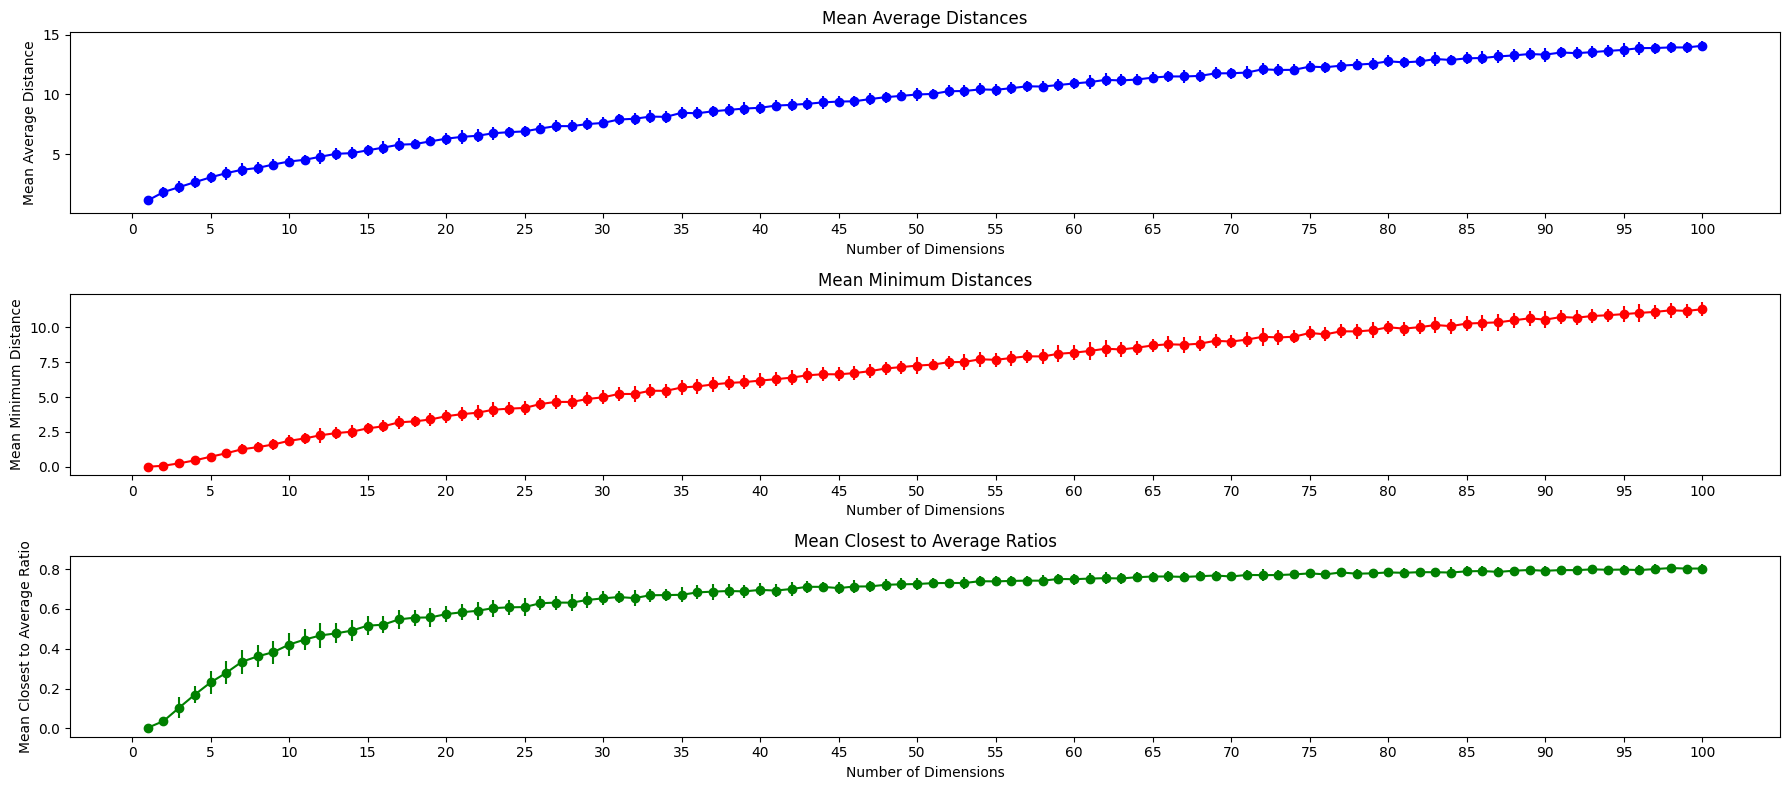

In [18]:
import matplotlib.pyplot as plt

# Plotting mean_avg_distances
plt.figure(figsize=(18, 8))  # Increase figure width

# Plotting mean_avg_distances with std deviation as error bars
plt.subplot(3, 1, 1)
plt.errorbar(range(1, 101), mean_avg_distances, yerr=std_avg_distances, fmt='-o', color='b')
plt.title('Mean Average Distances')
plt.xlabel('Number of Dimensions')
plt.ylabel('Mean Average Distance')
plt.xticks(range(0, 101, 5))

# Plotting mean_min_distances with std deviation as error bars
plt.subplot(3, 1, 2)
plt.errorbar(range(1, 101), mean_min_distances, yerr=std_min_distances, fmt='-o', color='r')
plt.title('Mean Minimum Distances')
plt.xlabel('Number of Dimensions')
plt.ylabel('Mean Minimum Distance')
plt.xticks(range(0, 101, 5))

# Plotting mean_closest_to_avg_ratios with std deviation as error bars
plt.subplot(3, 1, 3)
plt.errorbar(range(1, 101), mean_closest_to_avg_ratios, yerr=std_closest_to_avg_ratios, fmt='-o', color='g')
plt.title('Mean Closest to Average Ratios')
plt.xlabel('Number of Dimensions')
plt.ylabel('Mean Closest to Average Ratio')
plt.xticks(range(0, 101, 5))

plt.tight_layout()
plt.show()


# Analysis
As expected when the dimensions increase the distance increases and as we can see the minimum and average distances are correlated. They increase gradually and increase less as the dimensions increases


In [23]:
def pairwise_distances(points):
    n = len(points)
    distances = []
    for i in range(n):
        for j in range(i+1, n):
            distance = np.linalg.norm(points[i] - points[j])
            distances.append(distance)
    return distances




In [57]:
# Generate random points in different dimensions
dimensions = [2, 5, 10, 100]
num_points = 1000
dims=[]
for i in dimensions:
  points=random_points(num_points, i)
  pairwise= pairwise_distances(points)
  dims.append(pairwise)


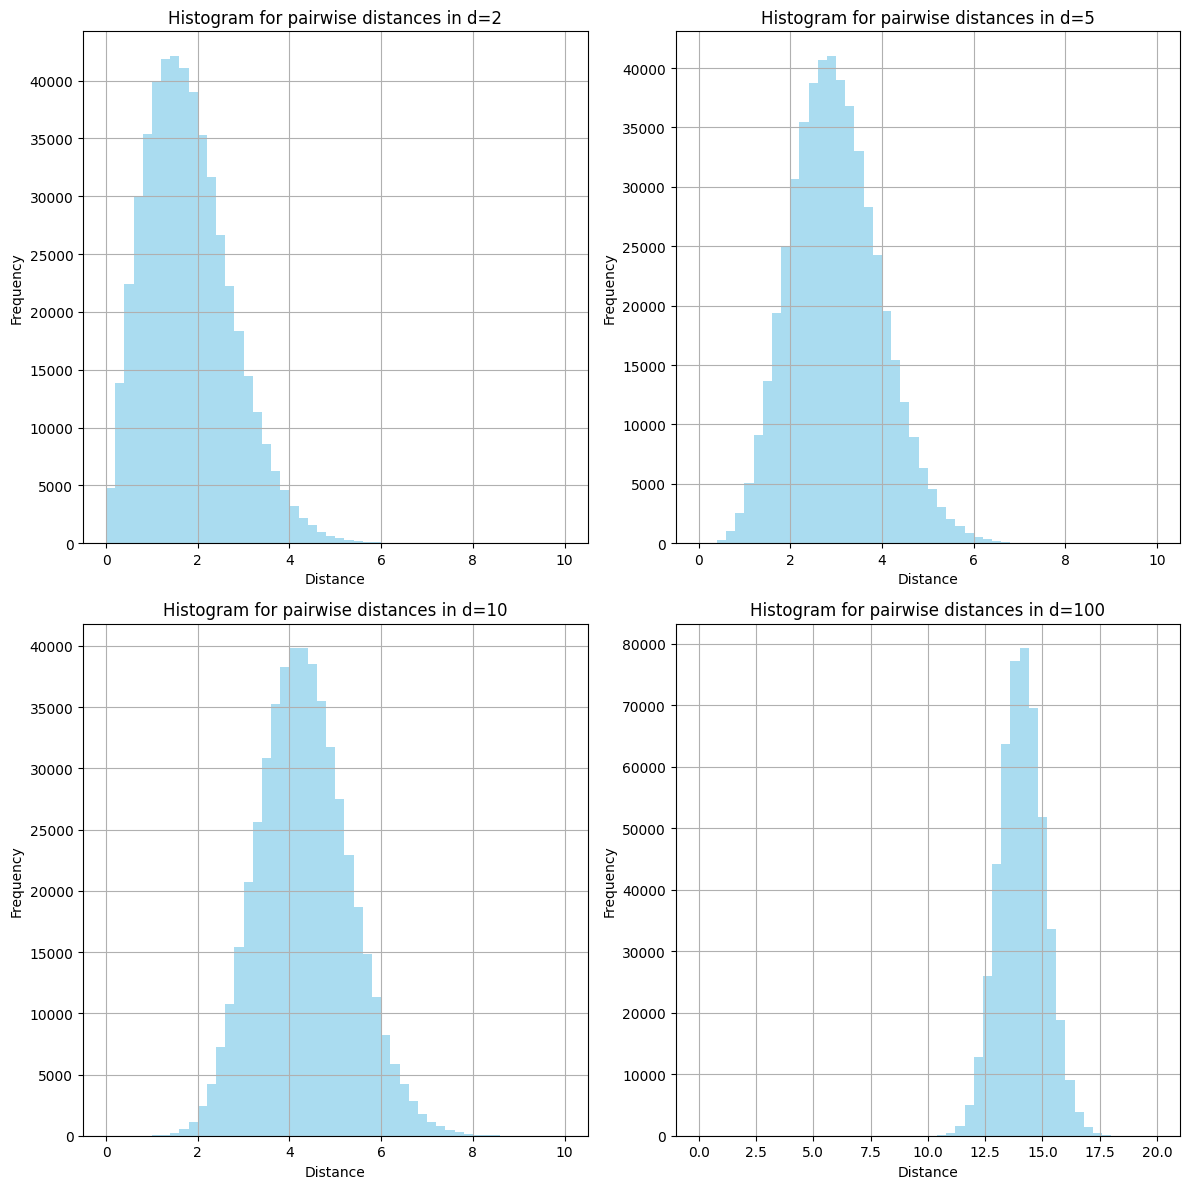

In [101]:
import matplotlib.pyplot as plt

# Define the data for each plot

# Create a list of titles for each plot
titles = ['Histogram for pairwise distances in d=2',
          'Histogram for pairwise distances in d=5',
          'Histogram for pairwise distances in d=10',
          'Histogram for pairwise distances in d=100']

# Create subplots for each data set
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot each histogram
x = 0
for i, data in enumerate(dims):
    row = x // 2
    col = x % 2
    if x == 3:
        axs[row, col].hist(data, bins=50, range=(0, 20), density=False, color='skyblue', alpha=0.7)
    else:
        axs[row, col].hist(data, bins=50, range=(0, 10), density=False, color='skyblue', alpha=0.7)
    axs[row, col].set_title(titles[i])
    axs[row, col].set_xlabel('Distance')  # Switch to x-axis
    axs[row, col].set_ylabel('Frequency')  # Switch to y-axis
    axs[row, col].grid(True)
    x += 1

plt.tight_layout()
plt.show()



# Analysis
All of the graphs are distributed normallly but as we increase the dimensions the data becmoes more condensed and closer to the mean increasing the peak.